<a href="https://colab.research.google.com/github/RVillanueva117/Data-Science-II/blob/main/DSII_Primera_Preentrega_Rodrigo_Villanueva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSII - Primera Preentrega**
USA Housing Dataset

Fuente: https://www.kaggle.com/datasets/fratzcan/usa-house-prices

Autor: Rodrigo Villanueva



El an√°lisis de datos de precios de viviendas busca comprender los factores estructurales y cualitativos que influyen en el valor de los inmuebles a partir de un conjunto de variables como superficie habitable, n√∫mero de ba√±os, dormitorios, a√±o de construcci√≥n, vista y estado general de la vivienda.
El objetivo principal radica en identificar qu√© caracter√≠sticas impactan de forma significativa en el precio, permitiendo construir modelos predictivos m√°s precisos y entender la din√°mica del mercado inmobiliario.

A trav√©s de t√©cnicas estad√≠sticas, visualizaciones y regresi√≥n lineal, este estudio demuestra que variables como la superficie habitable (sqft_living), la cantidad de ba√±os (bathrooms) y la vista (view), por ejemplo,  presentan una correlaci√≥n positiva y relevante con el precio, mientras que otras como el estado general (condition) y el a√±o de construcci√≥n (yr_built) ejercen una influencia mucho menor.

El prop√≥sito final es transformar la informaci√≥n bruta en conocimiento √∫til para la toma de decisiones estrat√©gicas.

Este an√°lisis est√° orientado a Empresas del sector inmobiliario y desarrolladores urbanos, interesados en identificar los atributos de mayor impacto econ√≥mico para optimizar proyectos y estrategias de precios, como as√≠ tambi√©n a Inversores y agentes inmobiliarios, que requieren informaci√≥n objetiva para evaluar oportunidades de compra y venta seg√∫n las caracter√≠sticas del inmueble.

Saving USA Housing Dataset.csv to USA Housing Dataset.csv
Shape: (4140, 18)

Tipos de datos:
 date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Valores nulos:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Estad√≠sticas descriptivas:
                 count unique            

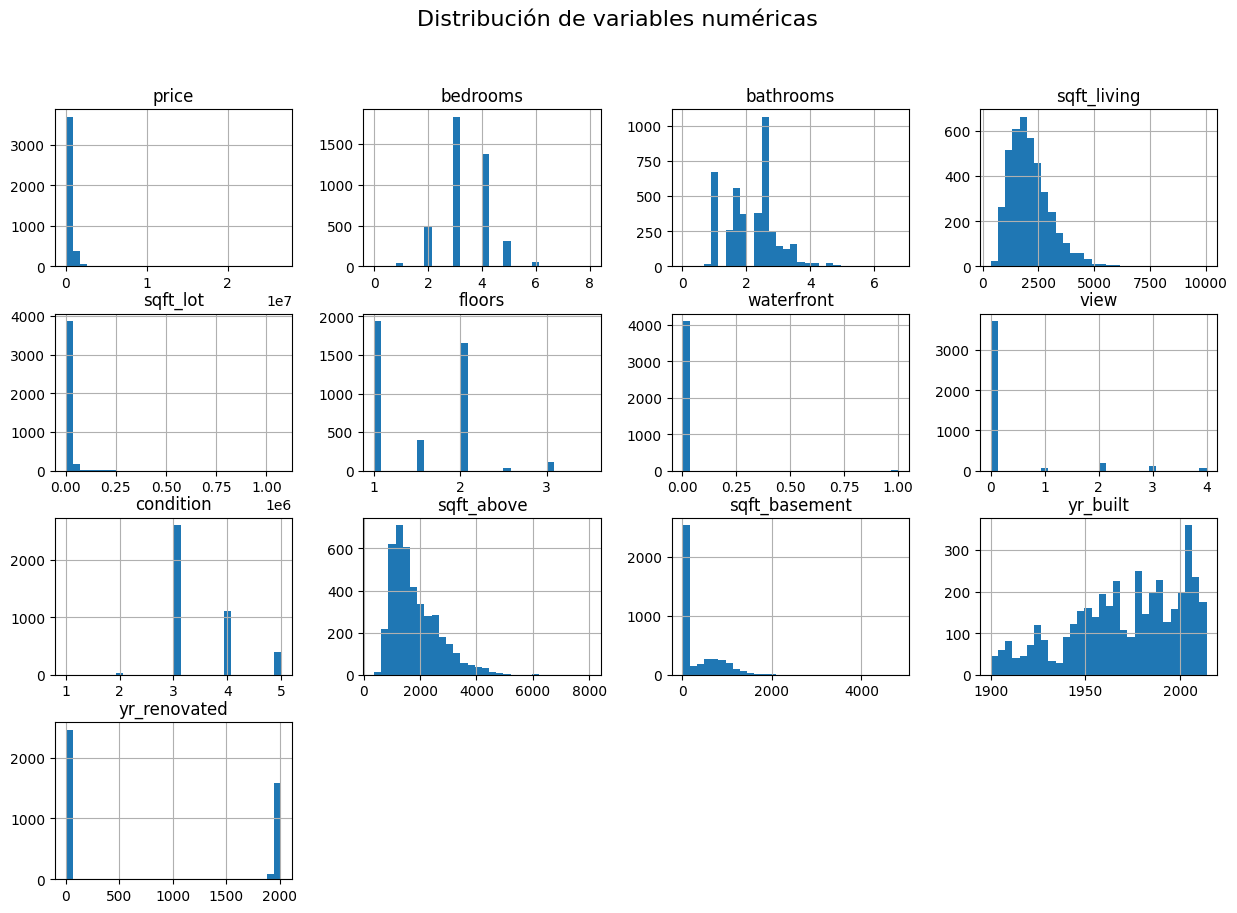

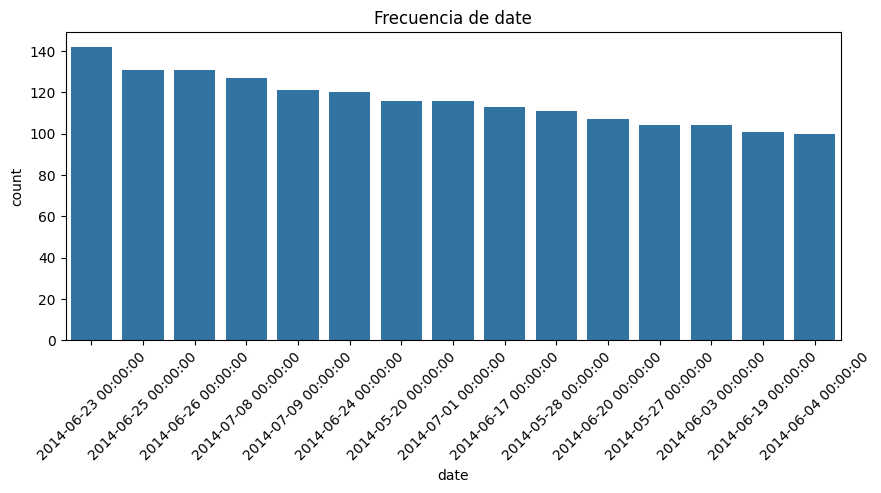

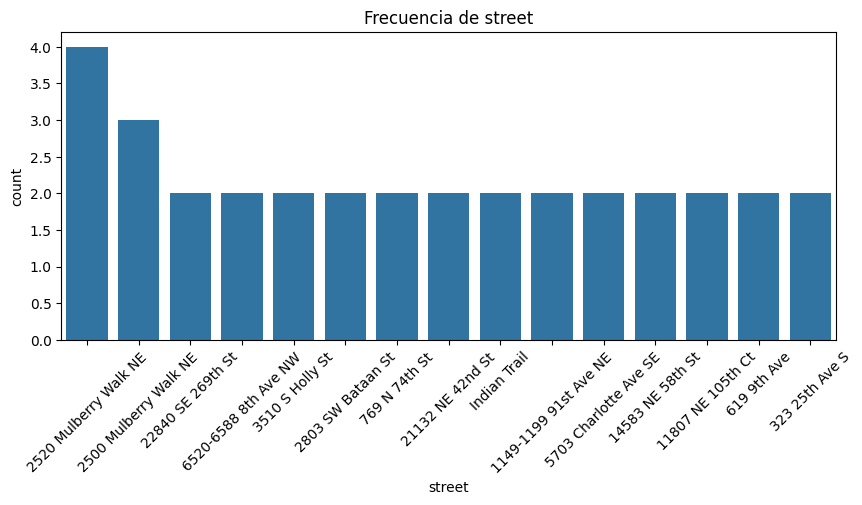

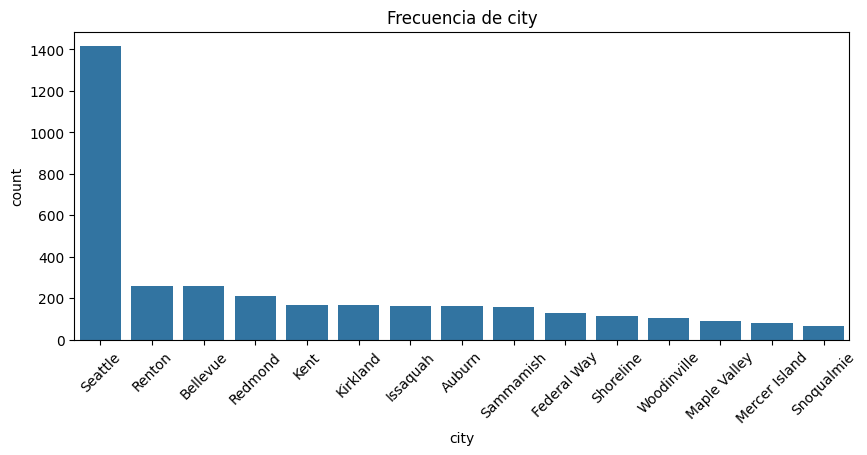

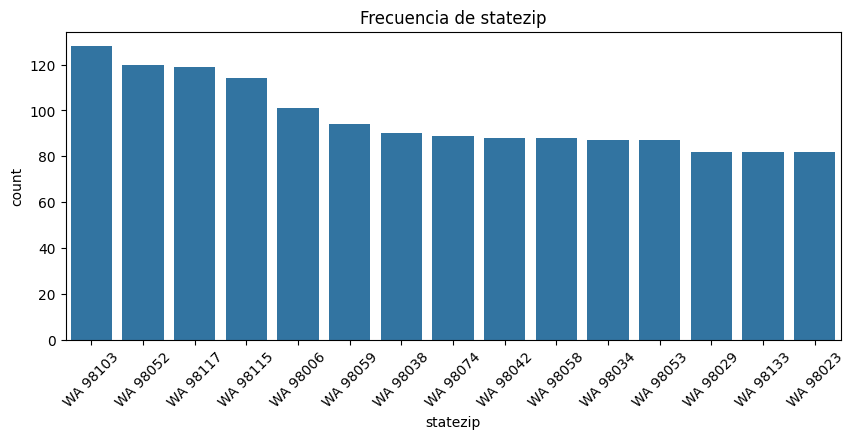

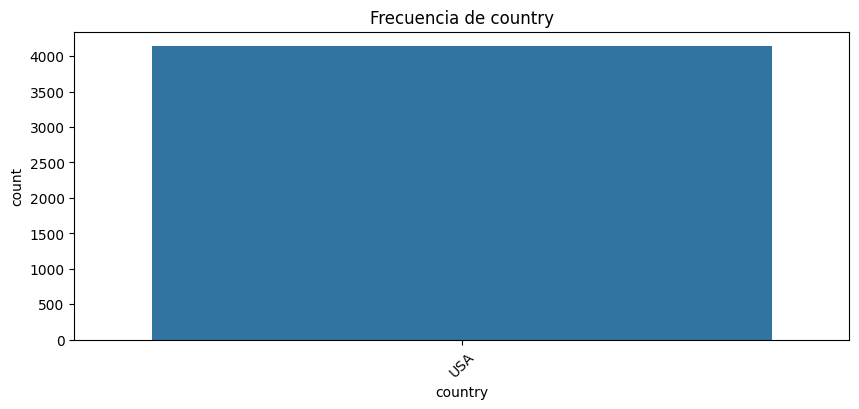

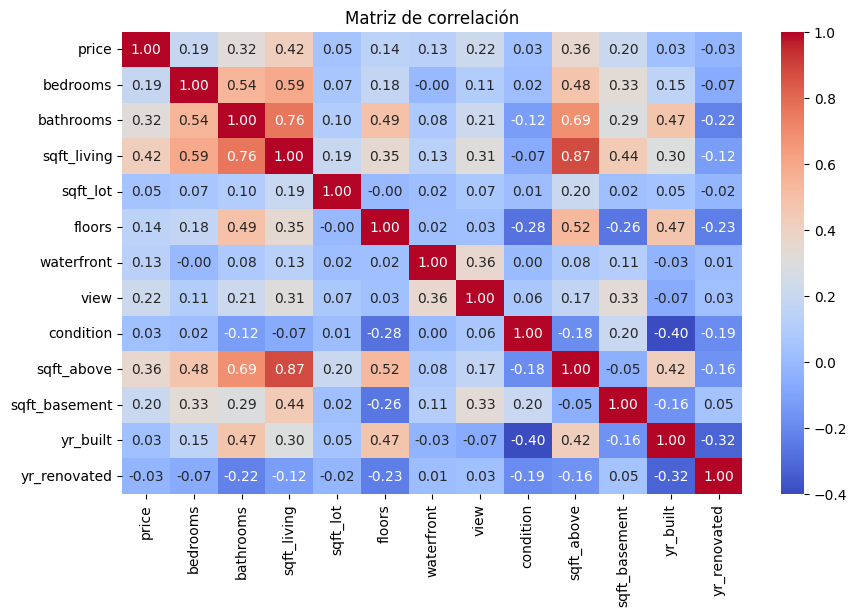

In [2]:
# ========================================================
# AN√ÅLISIS EXPLORATORIO DE DATOS PARA USA Housing Dataset
# ========================================================

# 1) Importar Librer√≠as:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 2) Subir archivo USA Housing Dataset:
uploaded = files.upload()

# 3) Leer el archivo
df = pd.read_csv("USA Housing Dataset.csv")

# 4) Info general
print("Shape:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos:\n", df.isnull().sum())

# 5) Estad√≠sticas b√°sicas
print("\nEstad√≠sticas descriptivas:\n", df.describe(include="all").transpose())

# 6) Histogramas para num√©ricas
num_cols = df.select_dtypes(include=["int64","float64"]).columns
df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribuci√≥n de variables num√©ricas", fontsize=16)
plt.show()

# 7) Barplots para categ√≥ricas (primeras 5 columnas)
cat_cols = df.select_dtypes(include=["object"]).columns[:5]
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:15])
    plt.title(f"Frecuencia de {col}")
    plt.xticks(rotation=45)
    plt.show()

# 8) Heatmap de correlaci√≥n
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaci√≥n")
plt.show()


# **¬øQu√© factores influyen m√°s en el precio de las propiedades en EEUU?**

¬øLas propiedades con m√°s a√±os de antig√ºedad de construcci√≥n (yr_built) siempre tienen un precio m√°s bajo?
Hip√≥tesis: A mayor antig√ºedad, menor precio.

¬øLas propiedades con mayor superficie habitable (sqft_living) resultan m√°s costosas?
Hip√≥tesis: Mayor superficie habitable = precios m√°s altos

¬øLa cantidad de habitaciones (bedrooms) incrementa significativamente el precio?
Hip√≥tesis: M√°s habitaciones = precios m√°s altos.

¬øLa cantidad de ba√±os (bathrooms) incrementa significativamente el precio?
Hip√≥tesis: M√°s ba√±os = precios m√°s altos.

¬øHay diferencias en precio por la vista (view) que posee la propiedad?
Hip√≥tesis: Los propiedades con mejor vista suelen ser m√°s caras.

¬øQu√© impacto tienen las condiciones generales de la vivienda (conditions) respecto del precio?
Hip√≥tesis: Mejores condiciones = mayor precio.


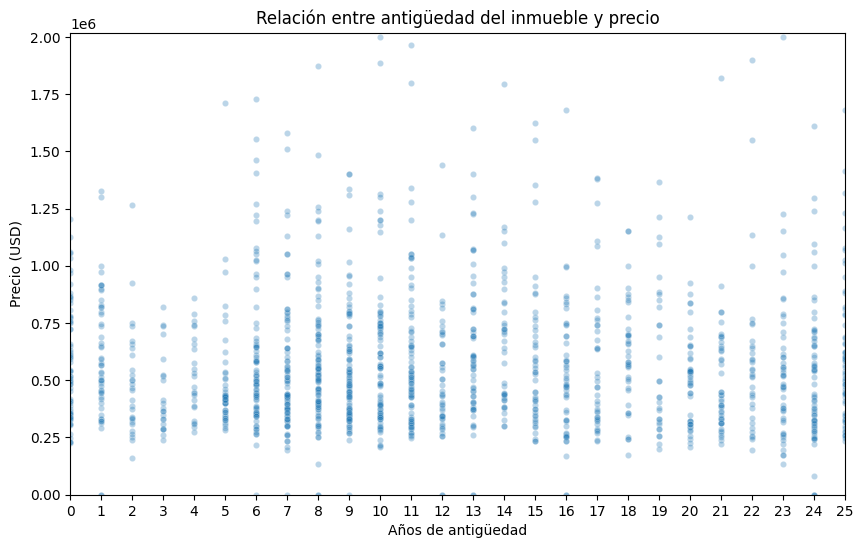

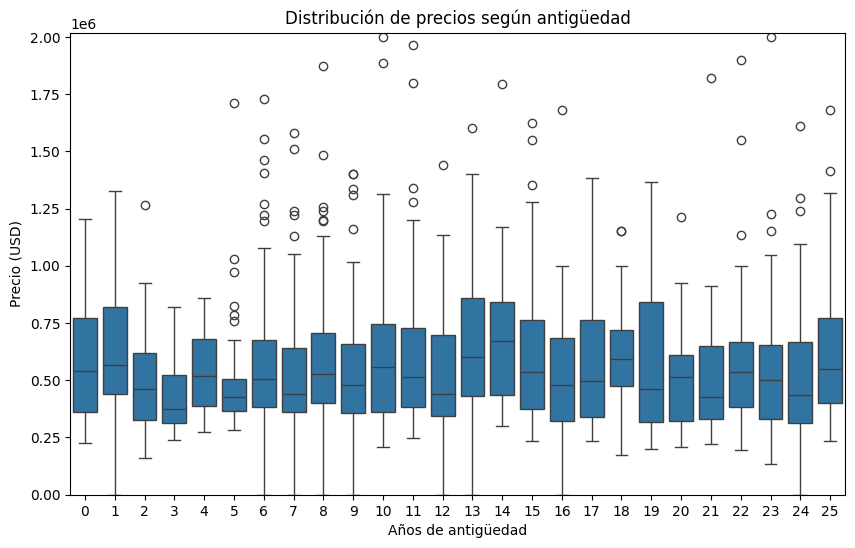

 Correlaci√≥n age vs price: -0.03


In [27]:
# ¬øLas propiedades con m√°s a√±os de antig√ºedad de construcci√≥n (yr_built) siempre tienen un precio m√°s bajo?

df = pd.read_csv("USA Housing Dataset.csv")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular antig√ºedad (tomando como referencia el a√±o m√°s nuevo del dataset)
ref_year = df["yr_built"].max()
df["age"] = ref_year - df["yr_built"]

# Eliminar outliers extremos:
q99 = df["price"].quantile(0.99)

# Scatterplot: antig√ºedad vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="price", alpha=0.3, s=20)
plt.title("Relaci√≥n entre antig√ºedad del inmueble y precio")
plt.xlabel("A√±os de antig√ºedad")
plt.ylabel("Precio (USD)")
plt.xlim(0, 25)
plt.ylim(0, q99)
plt.xticks(np.arange(0, 26, 1))
plt.show()

# Boxplot: antig√ºedad vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="age", y="price")
plt.title("Distribuci√≥n de precios seg√∫n antig√ºedad")
plt.xlabel("A√±os de antig√ºedad")
plt.ylabel("Precio (USD)")
plt.xlim(-0.5, 25.5)
plt.ylim(0, q99)
plt.xticks(np.arange(0, 26, 1), rotation=0)
plt.show()

# Correlaci√≥n entre antig√ºedad y precio
corr = df["age"].corr(df["price"])
print(f" Correlaci√≥n age vs price: {corr:.2f}")

# **Evidencia de los gr√°ficos**

Al visualizar los gr√°ficos obtenidos (Scatterplot y Boxplot) en relaci√≥n al impacto de la antig√ºedad de las propiedades respecto del precio de las mismas del presente dataset, la antig√ºedad del inmueble apenas influye en el precio. Puede haber una tendencia leve a que las propiedades m√°s nuevas valgan un poco m√°s, pero no es un patr√≥n fuerte ni consistente.


# **Insights**

La hip√≥tesis no se cumple de manera significativa en este dataset. El valor ‚Äì0.03 indica una relaci√≥n negativa muy d√©bil, casi nula. Aunque parece l√≥gico pensar que las propiedades m√°s viejas deber√≠an valer menos,
en este conjunto de datos esa tendencia no se observa de manera clara.
El precio parece depender mucho m√°s de otras variables (como superficie, ubicaci√≥n, n√∫mero de habitaciones, vista, condici√≥n, etc.) que de la antig√ºedad.

# üîµ Evidentemente la antig√ºedad de las propiedades no necesariamente impacta en el precio de las mismas. Al menos, no resulta un factor determinante para establecer el precio, el cual estar√≠a m√°s relacionado a otras variables.

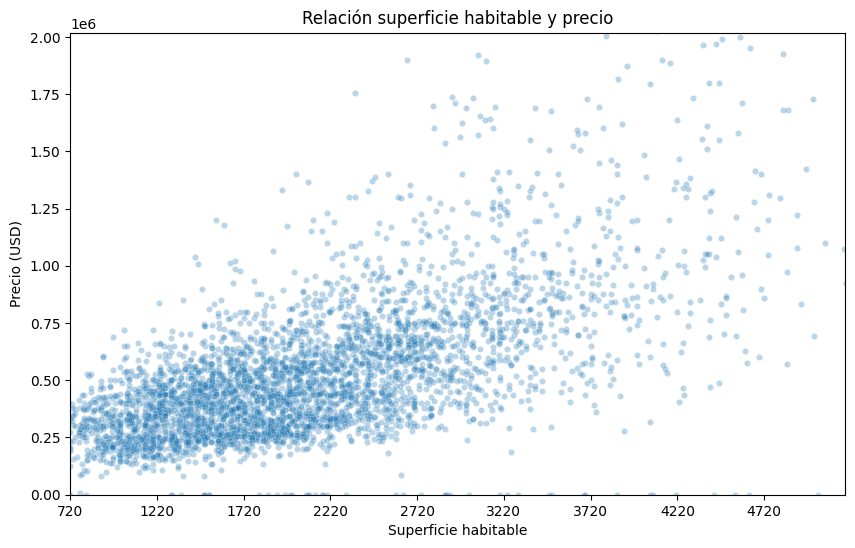

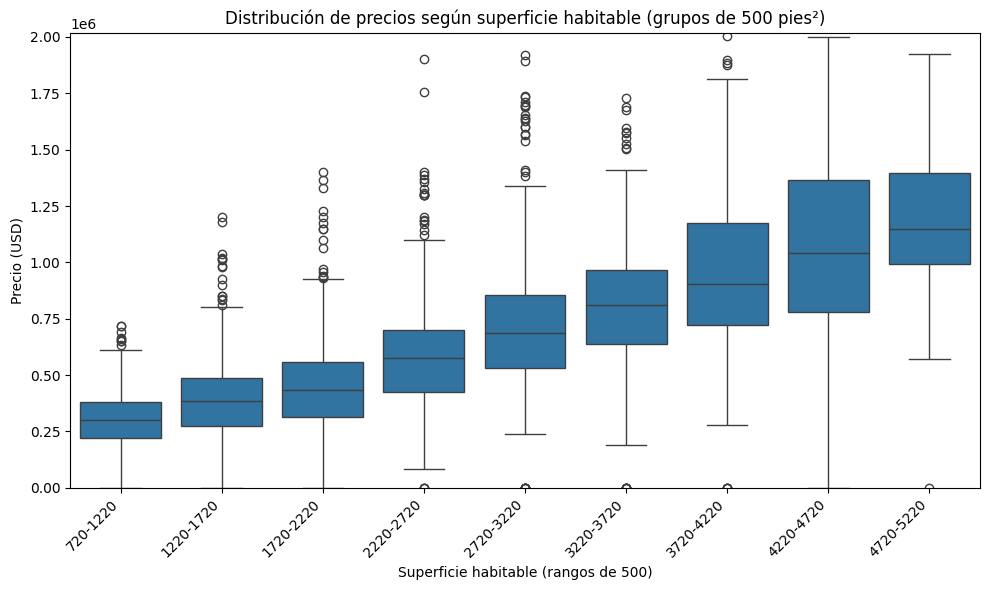

 Correlaci√≥n sqft_living vs price: 0.42


In [26]:
#¬øLas propiedades con mayor superficie habitable (sqft_living) resultan m√°s costosas?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular percentiles para definir l√≠mites que den lugar a una visualizaci√≥n que permita obtener insights
q_low = df["sqft_living"].quantile(0.01)
q_high = df["sqft_living"].quantile(0.99)
q99_price = df["price"].quantile(0.99)

# Scaterplot: superficie habitable vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="sqft_living", y="price", alpha=0.3, s=20)
plt.title("Relaci√≥n superficie habitable y precio")
plt.xlabel("Superficie habitable")
plt.ylabel("Precio (USD)")
plt.xlim(q_low, q_high)
plt.ylim(0, q99_price)
plt.xticks(np.arange(int(q_low), int(q_high)+1, 500))
plt.show()


# Crear una columna auxiliar con bins correspondientes a rangos de tama√±o
bins = np.arange(int(q_low), int(q_high) + 500, 500)
labels = [f"{int(b)}-{int(b+500)}" for b in bins[:-1]]
df["sqft_group"] = pd.cut(df["sqft_living"], bins=bins, labels=labels, include_lowest=True)

# Filtrar valores dentro del rango definido
df_box = df[(df["sqft_living"] >= q_low) & (df["sqft_living"] <= q_high) & (df["price"] <= q99_price)]

# Boxplot: superficie habitable vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df_box, x="sqft_group", y="price")

plt.title("Distribuci√≥n de precios seg√∫n superficie habitable (grupos de 500 pies¬≤)")
plt.xlabel("Superficie habitable (rangos de 500)")
plt.ylabel("Precio (USD)")

plt.xticks(rotation=45, ha="right")
plt.ylim(0, q99_price)
plt.tight_layout()
plt.show()

# Correlaci√≥n entre superficie habitable y precio
corr = df["sqft_living"].corr(df["price"])
print(f" Correlaci√≥n sqft_living vs price: {corr:.2f}")

# **Evidencia de los gr√°ficos**

Al visualizar los gr√°ficos obtenidos (Scatterplot y Boxplot) en relaci√≥n al impacto de la superficie habitable respecto del precio de las mismas, se puede observar que a medida que aumenta la superficie habitable (sqft_living), tiende a aumentar el precio (price). Esto queda evidenciado tambi√©n con el coeficiente 0.42 indica una correlaci√≥n positiva moderada


# **Insights**

En este caso si se cumple la hip√≥tesis, lo que significa que existe una relaci√≥n directa clara entre ambas variables.
En promedio, las propiedades con mayor superficie habitable tienden a tener precios m√°s altos.

# üîµ Queda demostrado que la correlaci√≥n entre la superficie habitable y el precio resulta una relaci√≥n positiva moderada, confirmando que los inmuebles con mayor superficie habitable tienden a presentar precios m√°s elevados.

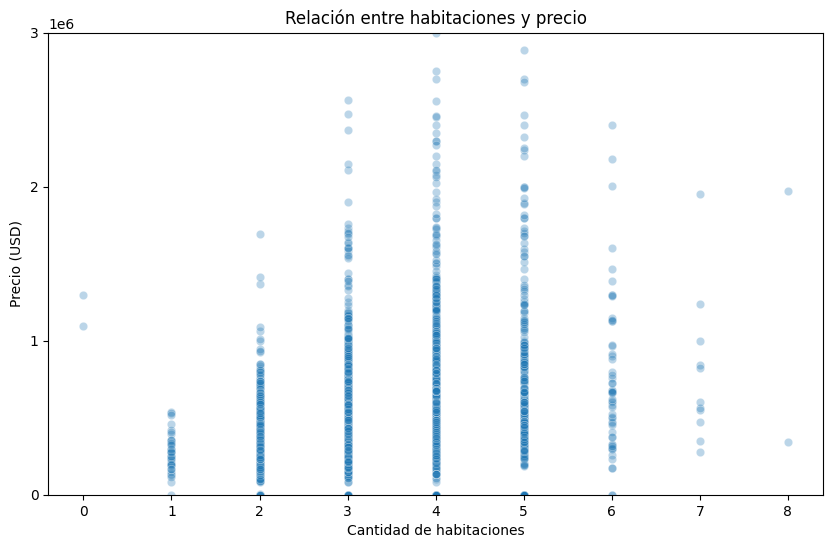

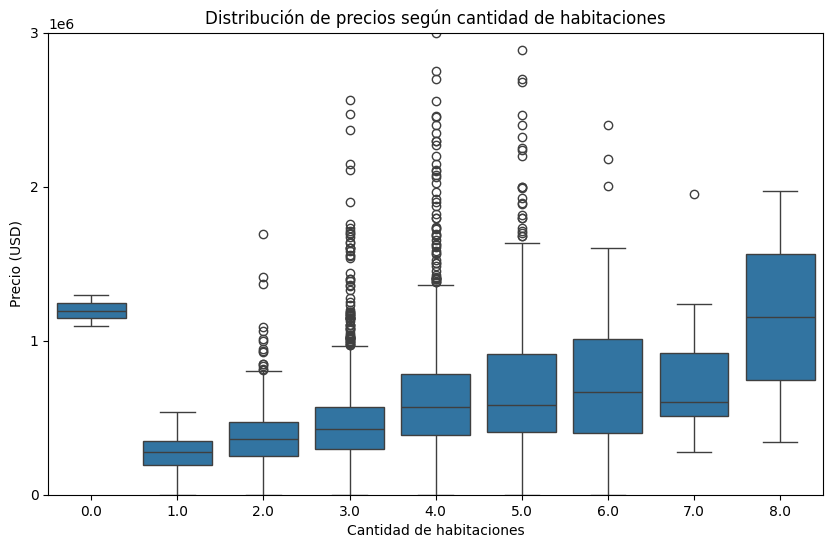

 Correlaci√≥n bedrooms vs price: 0.19


In [25]:
# ¬øLa cantidad de habitaciones (bedrooms) incrementa significativamente el precio?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular l√≠mite superior que de lugar a una visualizaci√≥n que permita obtener insights
q99_price = df["price"].quantile(0.99)

# Scatterplot: habitaciones vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="bedrooms", y="price", alpha=0.3)
plt.title("Relaci√≥n entre habitaciones y precio")
plt.xlabel("Cantidad de habitaciones")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Boxplot: habitaciones vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="bedrooms", y="price")
plt.title("Distribuci√≥n de precios seg√∫n cantidad de habitaciones")
plt.xlabel("Cantidad de habitaciones")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Correlaci√≥n entre habitaciones y precio
corr = df["bedrooms"].corr(df["price"])
print(f" Correlaci√≥n bedrooms vs price: {corr:.2f}")

# **Evidencia de los gr√°ficos**
Al visualizar los gr√°ficos obtenidos (Scatterplot y Boxplot) en relaci√≥n al impacto de la cantidad de habitaciones respecto del precio de las propiedades, se observa que en promedio, a mayor cantidad de habitaciones, mayor precio, no obstante, no se trata de una relaci√≥n fuerte ni consistente.

# **Insights**
Si bien se cumple la hip√≥tesis, aunque los inmuebles con m√°s habitaciones tienden a costar m√°s, la cantidad de dormitorios no explica gran parte de la variabilidad del precio.

# üîµ  Si bien los inmuebles con m√°s habitaciones tienden a presentar precios m√°s altos, la cantidad de dormitorios por s√≠ sola no es un predictor s√≥lido del valor de la propiedad.

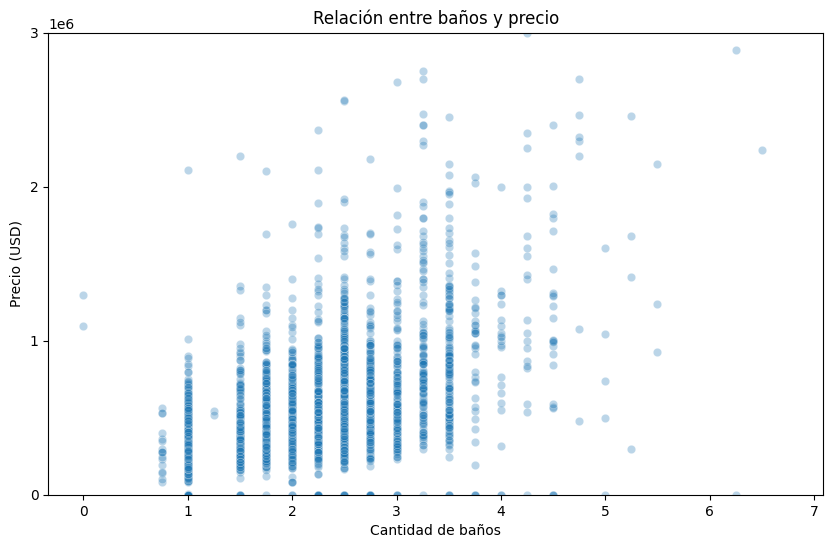

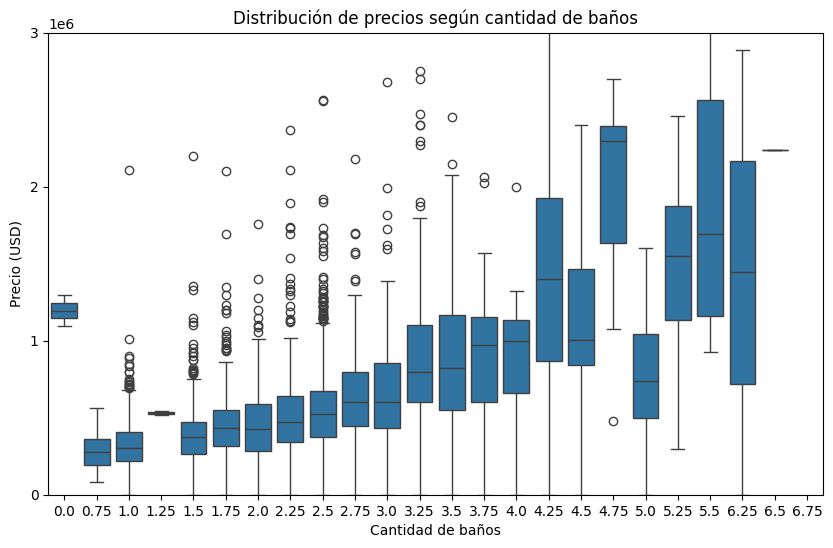

 Correlaci√≥n bathrooms vs price: 0.32


In [24]:
# ¬øLa cantidad de ba√±os (bathrooms) incrementa significativamente el precio?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular l√≠mite superior que de lugar a una visualizaci√≥n que permita obtener insights
q99_price = df["price"].quantile(0.99)

# Scatterplot: ba√±os vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="bathrooms", y="price", alpha=0.3)
plt.title("Relaci√≥n entre ba√±os y precio")
plt.xlabel("Cantidad de ba√±os")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Boxplot: ba√±os vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="bathrooms", y="price")
plt.title("Distribuci√≥n de precios seg√∫n cantidad de ba√±os")
plt.xlabel("Cantidad de ba√±os")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Correlaci√≥n entre ba√±os y precio
corr = df["bathrooms"].corr(df["price"])
print(f" Correlaci√≥n bathrooms vs price: {corr:.2f}")

# **Evidencia de los gr√°ficos**
Al visualizar los gr√°ficos obtenidos (Scatterplot y Boxplot) en relaci√≥n al impacto de la cantidad de ba√±os respecto del precio de las propiedades, se puede interpretar que medida que aumenta el n√∫mero de ba√±os, el precio del inmueble crece de forma consistente.



# **Insights**
Se cumple la hip√≥tesis, las propiedades con m√°s ba√±os tienden a tener precios m√°s altos. Este patr√≥n es m√°s fuerte que el de la cantidad de habitaciones, lo que sugiere que la comodidad (m√°s ba√±os por habitante) influye m√°s en el valor que el n√∫mero de dormitorios, se puede asumir tambi√©n que m√°s ba√±os est√©n asociados a mayor superficie habitable, reforzando la relaci√≥n entre cantidad de ba√±os y precio.

# üîµ Las propiedades con m√°s ba√±os tienden a presentar precios m√°s altos, reflejando el valor agregado de la comodidad y el tama√±o de la vivienda.

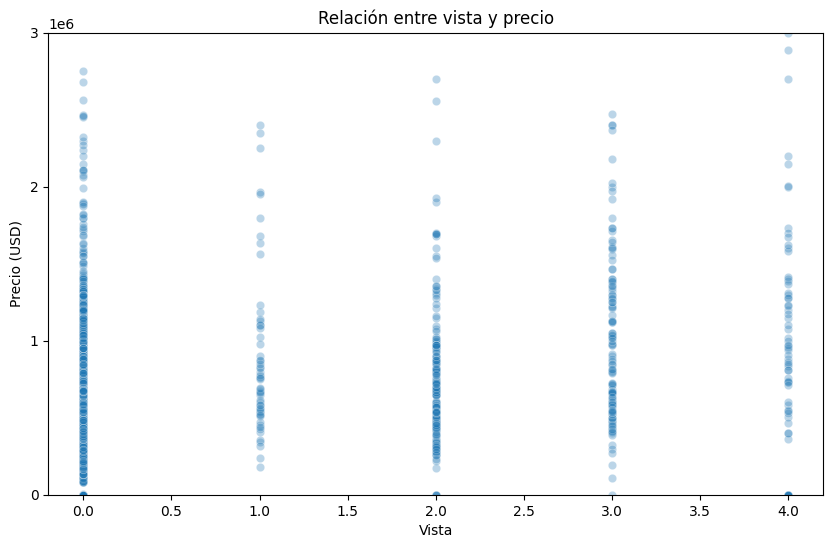

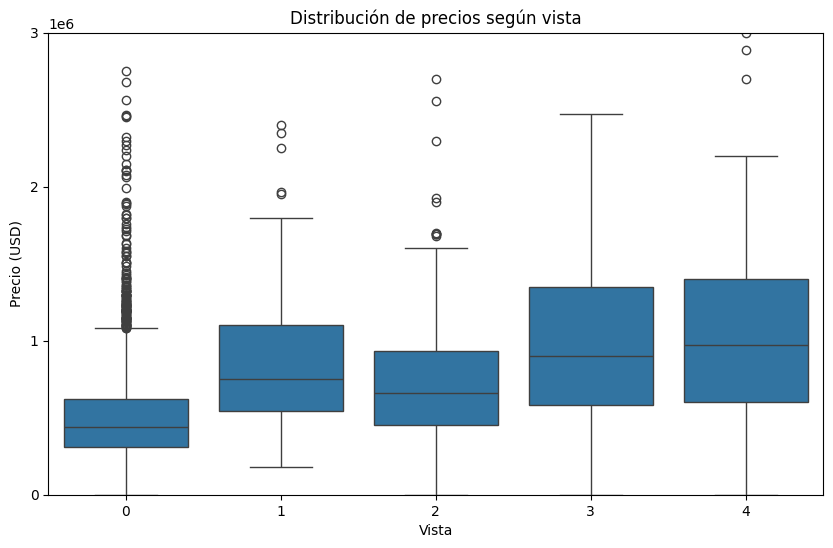

 Correlaci√≥n view vs price: 0.22


In [22]:
# ¬øHay diferencias en precio por la vista (view) que posee la propiedad?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular l√≠mite superior que de lugar a una visualizaci√≥n que permita obtener insights
q99_price = df["price"].quantile(0.99)

# Scatterplot: vista vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="view", y="price", alpha=0.3)
plt.title("Relaci√≥n entre vista y precio")
plt.xlabel("Vista")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Boxplot: vista vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="view", y="price")
plt.title("Distribuci√≥n de precios seg√∫n vista")
plt.xlabel("Vista")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Correlaci√≥n entre vista y precio
corr = df["view"].corr(df["price"])
print(f" Correlaci√≥n view vs price: {corr:.2f}")

# **Evidencia de los gr√°ficos**
Al visualizar los gr√°ficos obtenidos (Scatterplot y Boxplot) en relaci√≥n al impacto de la vista de la propiedad respecto del precio, se oobserva que a medida que mejora la vista, el precio tiende a aumentar

# **Insights**
Si bien se cumple con la hip√≥tesis, las propiedades con mejor vista suelen valer m√°s, pero la vista por s√≠ sola no explica una gran parte del precio

# üîµ Las propiedades con mejores vistas tienden a alcanzar precios m√°s elevados, aunque este efecto no es dominante frente a otras variables estructurales como superficie o n√∫mero de ba√±os.

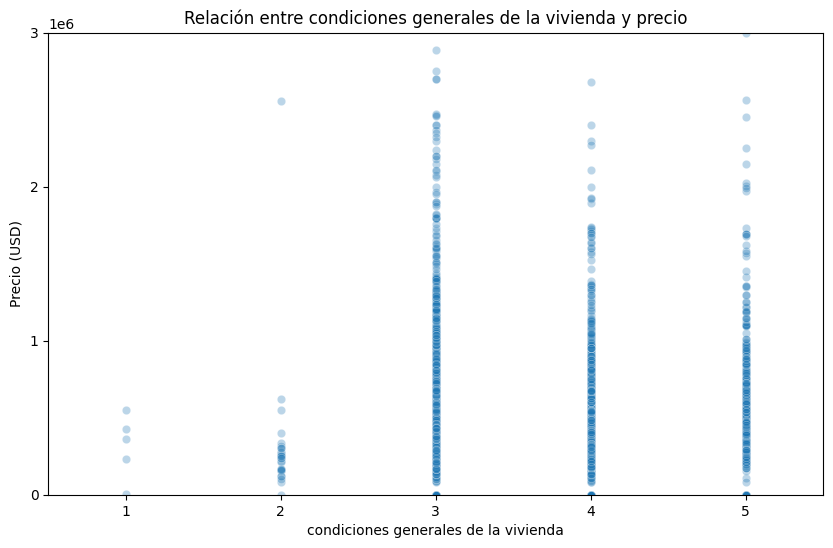

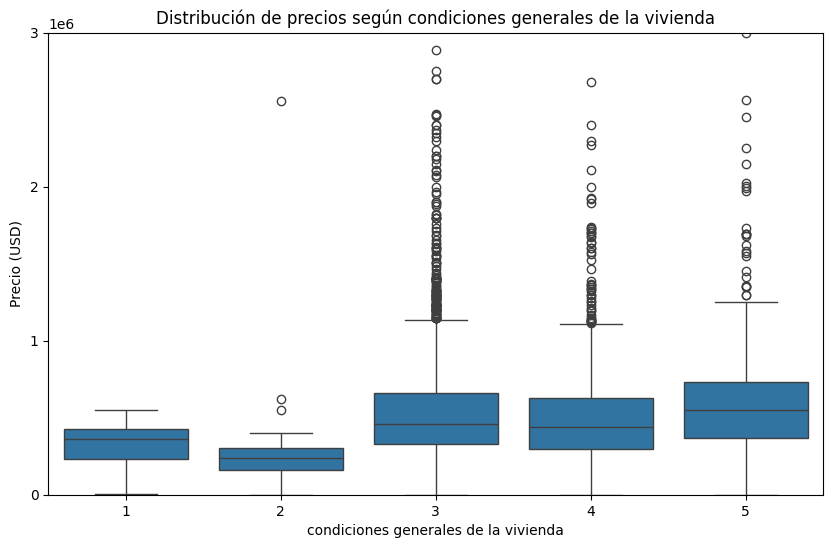

 Correlaci√≥n condition vs price: 0.03


In [23]:
# ¬øQu√© impacto tienen las condiciones generales de la vivienda (condition) respecto del precio?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular l√≠mite superior que de lugar a una visualizaci√≥n que permita obtener insights
q99_price = df["price"].quantile(0.99)

# Scatterplot: condiciones generales de la vivienda vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="condition", y="price", alpha=0.3)
plt.title("Relaci√≥n entre condiciones generales de la vivienda y precio")
plt.xlabel("condiciones generales de la vivienda")
plt.ylabel("Precio (USD)")
plt.xlim(0.5, 5.5)
plt.xticks(np.arange(1, 6, 1))
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Boxplot: condiciones generales de la vivienda vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="condition", y="price")
plt.title("Distribuci√≥n de precios seg√∫n condiciones generales de la vivienda")
plt.xlabel("condiciones generales de la vivienda")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Correlaci√≥n entre condiciones generales de la vivienda y precio
corr = df["condition"].corr(df["price"])
print(f" Correlaci√≥n condition vs price: {corr:.2f}")

# **Evidencia de los gr√°ficos**
Al visualizar los gr√°ficos obtenidos (Scatterplot y Boxplot) en relaci√≥n al entre las condiciones generales de la vivienda y el precio, se observa que la variable condition no impacta fuertemente en el precio.

# **Insights**
No se cumple la hi¬¥+otesis, aunque parecer√≠a l√≥gico pensar que una casa en mejor estado deber√≠a valer m√°s que una en mal estado, en este dataset esa tendencia no se refleja claramente.

# üîµ El estado general de la vivienda no explica las variaciones de precio de forma significativa.

# **MODELO**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Selecci√≥n de variables
features = ["yr_built", "sqft_living", "bedrooms", "bathrooms", "view", "condition"]
X = df[features]
y = df["price"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# M√©tricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("üìå RMSE:", rmse)
print("üìå R¬≤:", r2)

# Coeficientes
coef = pd.DataFrame({"Variable": features, "Coeficiente": model.coef_})
print("\nCoeficientes del modelo:")
print(coef)



üìå RMSE: 254800.8944017073
üìå R¬≤: 0.3807104481457786

Coeficientes del modelo:
      Variable   Coeficiente
0     yr_built  -2079.029171
1  sqft_living    272.459881
2     bedrooms -69861.233027
3    bathrooms  66227.156334
4         view  49602.542317
5    condition  18853.481348


RMSE ‚âà 254 800 USD ‚Üí El modelo tiene un error promedio de ¬±254 800 USD en la predicci√≥n del precio

R¬≤ ‚âà 0.38 ‚Üí El modelo explica el 38 % de la variabilidad del precio. Es un nivel moderado, todav√≠a un 62 % de la variaci√≥n queda sin explicar

# üìå Coeficientes (interpretaci√≥n)

yr_built = ‚Äì2 079

Cada a√±o m√°s nuevo aumenta el precio en ~2 079 USD, implica que las propiedades m√°s antiguas valen menos.

sqft_living = +272

Por cada pie cuadrado adicional de superficie habitable, el precio aumenta en promedio 272 USD. Es el predictor m√°s influyente.


bedrooms = ‚Äì69 861

A igualdad de superficie, m√°s dormitorios se asocian con precios algo menores. Se puede interpretar que m√°s habitaciones en la misma superficie implican ambientes m√°s peque√±os o menor lujo.

bathrooms = +66 227

Cada ba√±o adicional se asocia con un aumento promedio de 66 227 USD en el precio, reflejando el valor agregado del confort y suponiendo una mayor superficie habitable.

view = +49 602

Las propiedades con mejor vista tienden a valer unos 49 600 USD m√°s.

condition = +18 853

Mejorar la condici√≥n del inmueble (por ejemplo, de 3 a 4) se asocia con un incremento medio de ~18 800 USD. Su efecto es positivo, aunque menor que el de ba√±os o vista.



# üîë Insights

La superficie (sqft_living) es el factor m√°s determinante del precio.
Su efecto positivo y alto confirma que el tama√±o del inmueble es la principal variable estructural que explica el valor.

Los ba√±os tambi√©n tienen un fuerte peso.
Incrementar la cantidad de ba√±os genera un aumento considerable del precio, m√°s que el n√∫mero de habitaciones.

El n√∫mero de dormitorios puede tener un efecto inverso.
Esto ocurre cuando las casas con m√°s habitaciones no necesariamente son m√°s grandes, sino que distribuyen peor el espacio.

La vista (view) supone un incremento en el precio, aunque su correlaci√≥n no es muy elevada (0.22)

El estado (condition) y el a√±o de construcci√≥n (yr_built) tambi√©n influyen, pero en menor grado.

El modelo explica el 38 % de la variaci√≥n del precio, lo cual sugiere que falta considerar otras variables que tal vez resulten relevantes para el precio de la vivienda

